In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def F(x):
    return x ** 2 * (1 + abs(np.sin(80 * x)))

In [3]:
x_space = np.linspace(-2, 2, 1000)

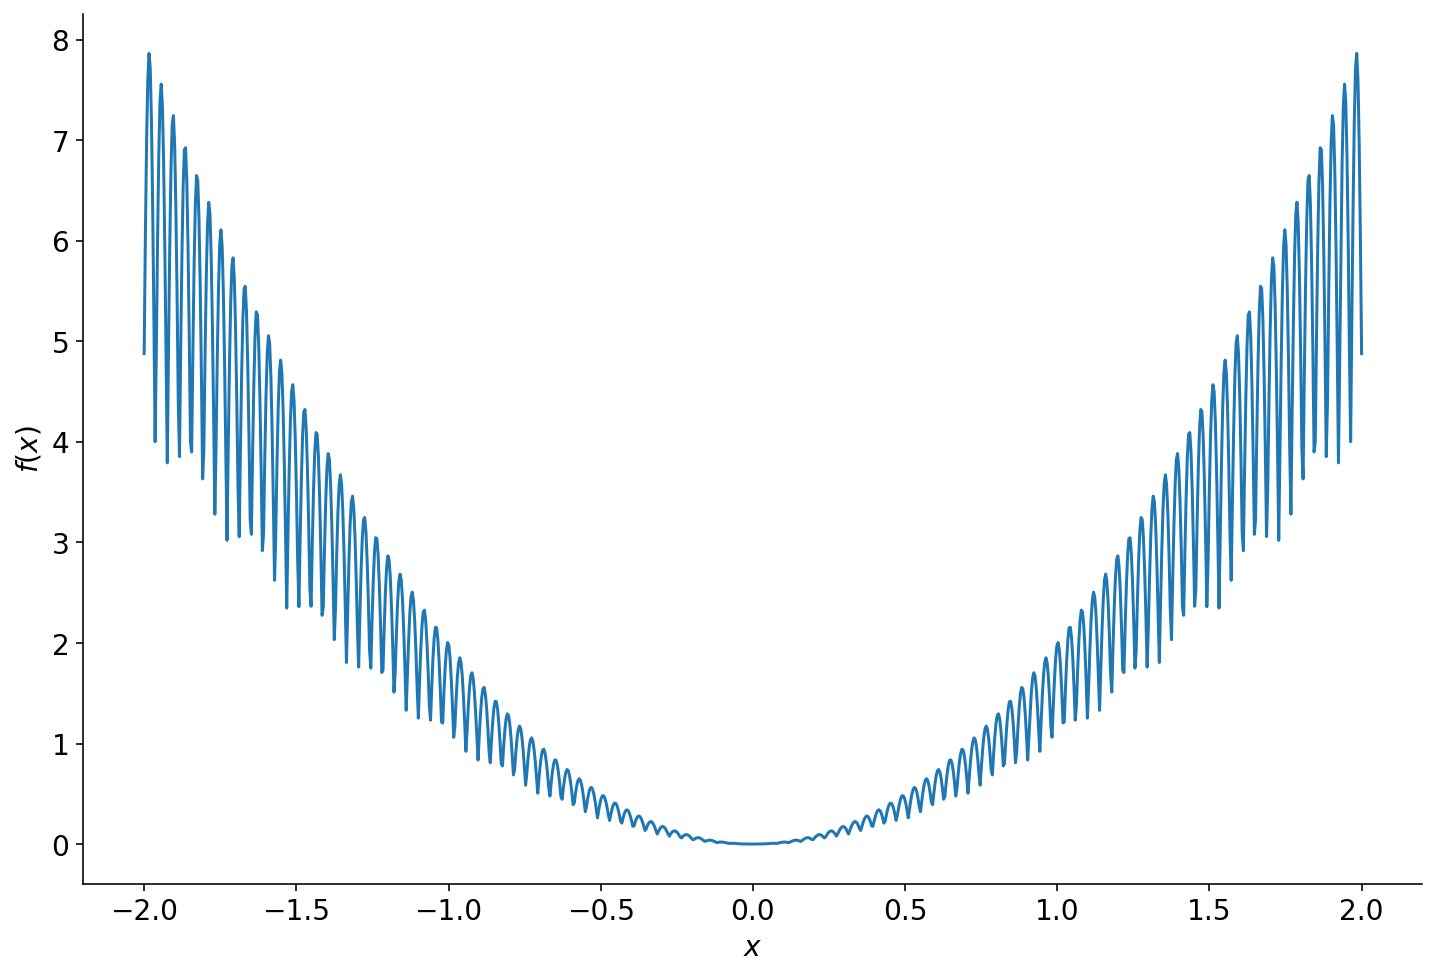

In [5]:
fig = plt.figure(figsize=(12, 8))

# Удаляем лишние границы
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.xlabel("$x$", fontsize=14)  
plt.ylabel("$f(x)$", fontsize=14)

plt.plot(x_space, F(x_space));

In [6]:
fig.savefig("func_min.png", bbox_inches='tight', dpi=600)

In [6]:
def SA_adj(space, T, epsilon):
    np.random.seed(777)
    x_hat = np.random.choice(space)
    history = list()
    history.append(x_hat)
    T_0 = T
    k = 1
    while True:
        x_tilda = np.random.normal(x_hat, T) # Используем семейство нормальных распределений в качестве функции G
        delta = F(x_tilda) - F(x_hat)
        prob = np.exp(- delta / T)
        
        if (delta < 0) or (prob >= np.random.random()):
            x_hat = x_tilda
            history.append(x_hat)
            
            if (x_hat < epsilon) and (x_hat > 0):
                return x_hat, history
            
        T = T_0 / np.log(1 + k) # Больцмановский отжиг
        k += 1

In [7]:
%timeit x_opt_1, h_1 = SA_adj(x_space, T=100, epsilon=10 ** -1)

2.12 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit x_opt_2, h_2 = SA_adj(x_space, T=100, epsilon=10 ** -2)

48.8 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%timeit x_opt_4, h_4 = SA_adj(x_space, T=100, epsilon=10 ** -4)

1.6 s ± 193 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit x_opt_6, h_6 = SA_adj(x_space, T=100, epsilon=10 ** -4)

1.26 s ± 27.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
x_opt_1, h_1 = SA_adj(x_space, T=0.6, epsilon=10 ** -1)

In [12]:
x_opt_2, h_2 = SA_adj(x_space, T=0.6, epsilon=10 ** -2)

In [13]:
x_opt_4, h_4 = SA_adj(x_space, T=0.6, epsilon=10 ** -4)

In [14]:
x_opt_6, h_6 = SA_adj(x_space, T=0.6, epsilon=10 ** -4)

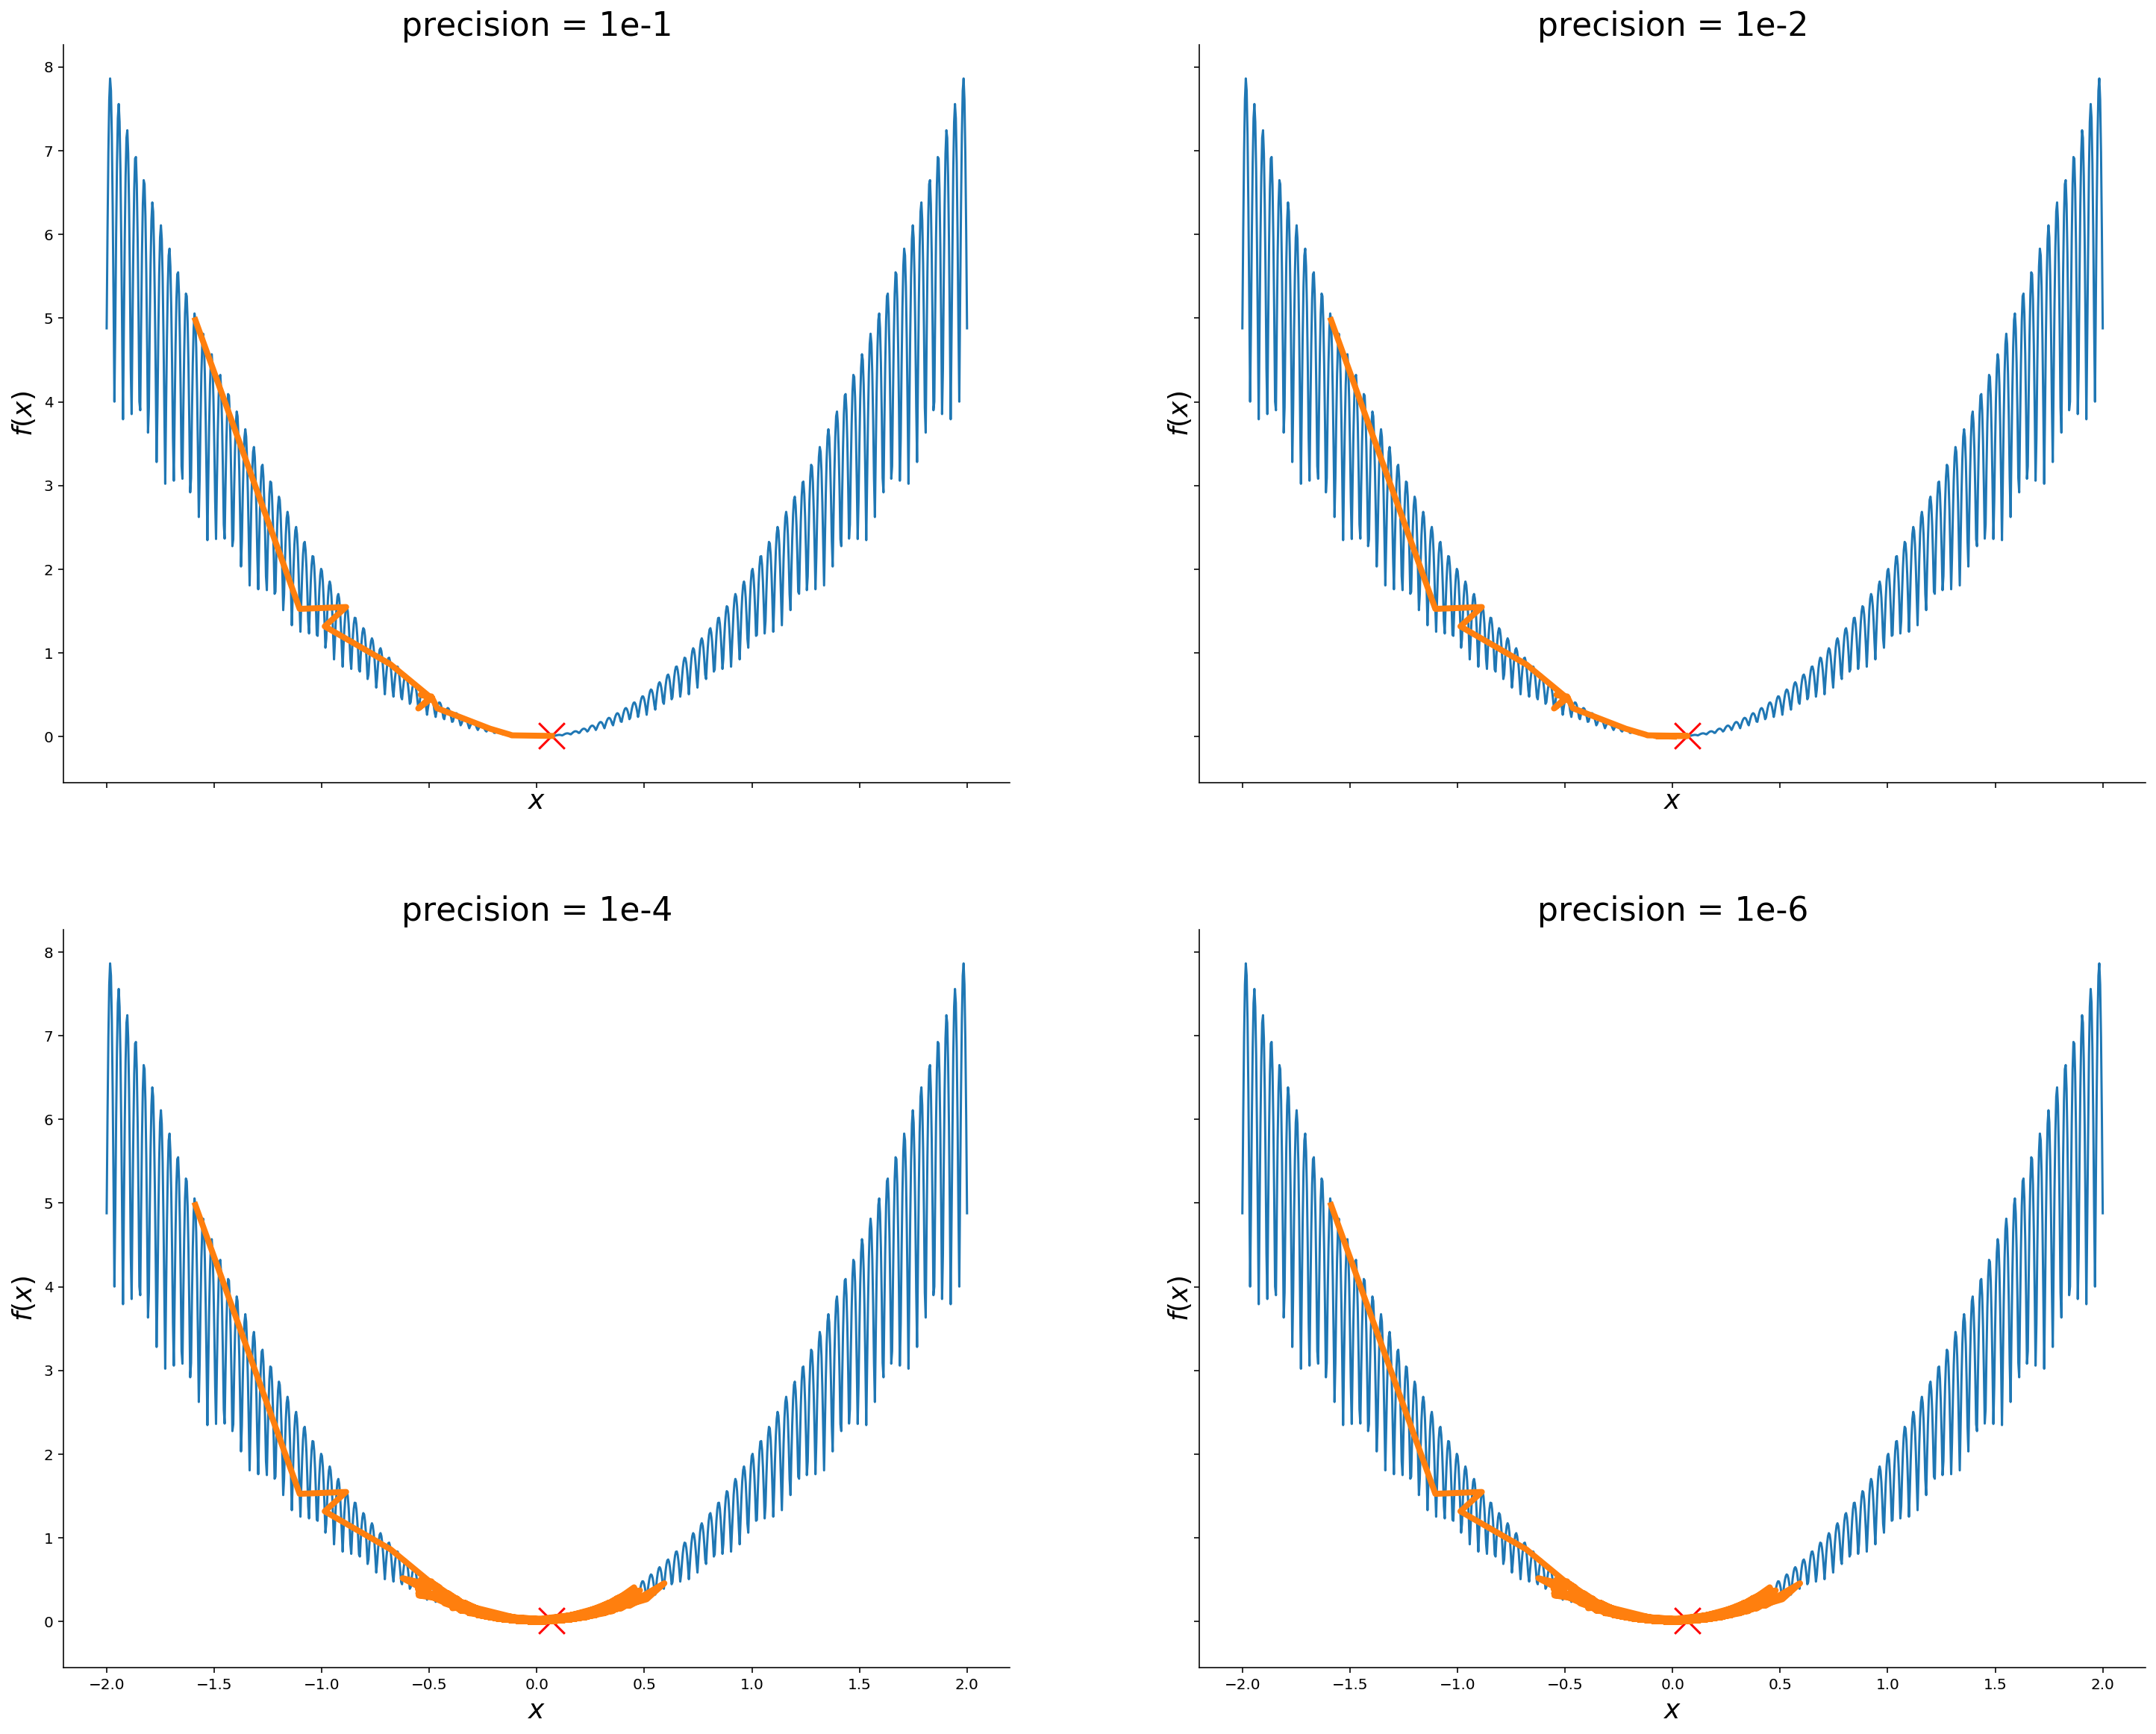

In [15]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(25, 20))

precision = ['1e-1', '1e-2', '1e-4', '1e-6']
h = [h_1, h_2, h_4, h_6]
k = 0

for i in range(2):
    for j in range(2):
        ax[i, j].set_title("precision = {}".format(precision[k]), fontsize=22)
        ax[i, j].plot(x_space, F(x_space))
        ax[i, j].scatter(x_opt_1, F(x_opt_1), marker="x", color="red", s=300)
        ax[i, j].plot(h[k], F(np.asarray(h[k])), linewidth=4)
        ax[i, j].set_ylabel('$f(x)$', fontsize=18)
        ax[i, j].set_xlabel('$x$', fontsize=18)
        ax[i, j].spines["top"].set_visible(False)  
        ax[i, j].spines["right"].set_visible(False)
        ax[i, j].get_xaxis().tick_bottom()
        ax[i, j].get_yaxis().tick_left() 
        k += 1

In [26]:
fig.savefig("func_min1.png", bbox_inches='tight', dpi=600)